In [18]:
from zen_garden.postprocess.results import Results
from pathlib import Path

In [19]:
# Adjust these to your actual folder locations
path1 = Path(r"./outputs/01_SP_MV_PV")  # or absolute path if needed
path2 = Path(r"./outputs/01_SP_MV_PV_new")

In [20]:
r1 = Results(path1)
r2 = Results(path2)

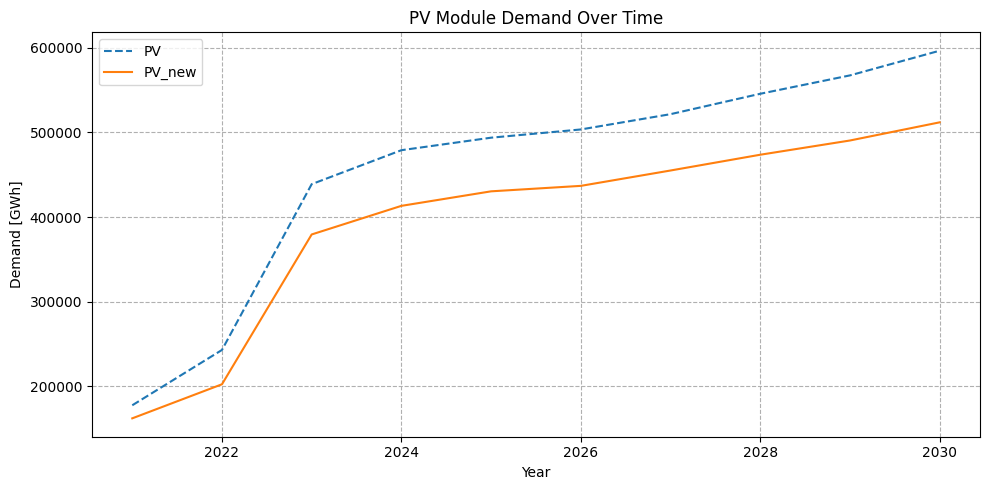

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load demand from both datasets ---
d1 = r1.get_full_ts("demand").reset_index()
d2 = r2.get_full_ts("demand").reset_index()

# --- Ensure first column is 'carrier' ---
if d1.columns[0] not in ["carrier", "node"]:
    d1.columns.values[0] = "carrier"
if d2.columns[0] not in ["carrier", "node"]:
    d2.columns.values[0] = "carrier"

# --- Filter for carrier = "pv_module" ---
d1_pv = d1[d1["carrier"] == "pv_module"]
d2_pv = d2[d2["carrier"] == "pv_module"]

# --- Identify time step columns ---
time_cols = [col for col in d1_pv.columns if isinstance(col, (int, float))]

# --- Sum across all nodes ---
d1_sum = d1_pv[time_cols].sum().reset_index()
d2_sum = d2_pv[time_cols].sum().reset_index()

# --- Rename columns for plotting ---
d1_sum.columns = ["year", "value"]
d2_sum.columns = ["year", "value"]

# --- Convert time step to actual calendar years ---
start_year = 2021  # adjust if needed
d1_sum["year"] = d1_sum["year"] + start_year
d2_sum["year"] = d2_sum["year"] + start_year

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(d1_sum["year"], d1_sum["value"], label="PV", linestyle="--")
plt.plot(d2_sum["year"], d2_sum["value"], label="PV_new", linestyle="-")
plt.title("PV Module Demand Over Time")
plt.xlabel("Year")
plt.ylabel("Demand [GWh]")
plt.grid(True, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

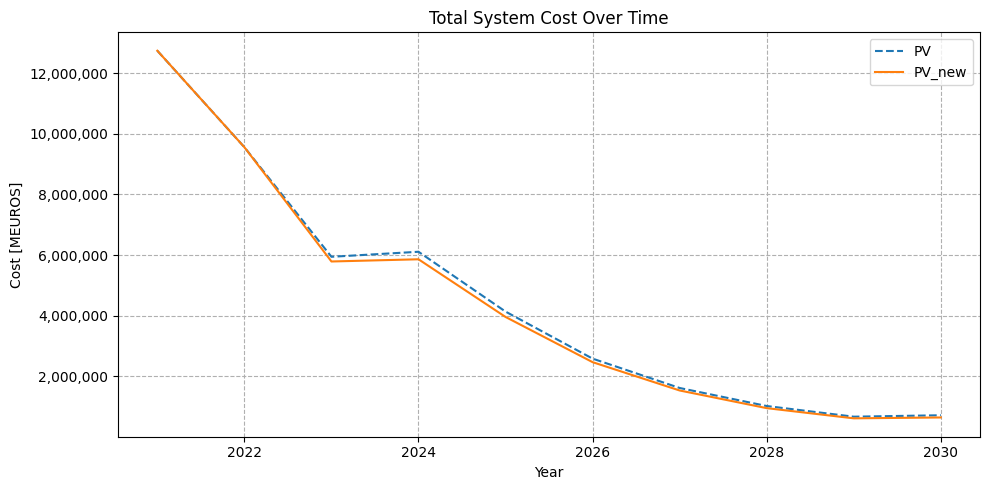

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load and prepare
cost1 = r1.get_full_ts("cost_total").reset_index()
cost2 = r2.get_full_ts("cost_total").reset_index()

# Convert time steps to calendar years
cost1["year"] = cost1["year"] + 2021
cost2["year"] = cost2["year"] + 2021

# Plot
plt.figure(figsize=(10, 5))
plt.plot(cost1["year"], cost1["value"], label="PV", linestyle="--")
plt.plot(cost2["year"], cost2["value"], label="PV_new", linestyle="-")
plt.title("Total System Cost Over Time")
plt.xlabel("Year")
plt.ylabel("Cost [MEUROS]")
plt.grid(True, linestyle="--")

# Format y-axis to show plain numbers with thousands separator
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.legend()
plt.tight_layout()
plt.show()
